# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [206]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [208]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [209]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
city_name = []
lat = []
lng = []
max_temp = []
humidity =[]
clouds = []
wind = []
country = []
date = []




In [210]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+weather_api_key + "&units=" + "metric" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        #store the city data for plotting
        city_name.append(city)
        lat.append(city_lat)
        lng.append(city_lng)
        max_temp.append(city_max_temp)
        humidity.append(city_humidity)
        clouds.append(city_clouds)
        wind.append(city_wind)
        country.append(city_country)
        date.append(city_date)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | viedma
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | watertown
Processing Record 6 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | mocambique
City not found. Skipping...
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | umm kaddadah
Processing Record 12 of Set 1 | mayo
Processing Record 13 of Set 1 | kloulklubed
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | mandera
Processing Record 16 of Set 1 | yulara
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | saint-georges
Processing Record 19 of Set 1 | laguna
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of

In [169]:
#test

48

In [211]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({"City": city_name, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

# # Show Record Count
city_data_df.count()

City          530
Lat           530
Lng           530
Max Temp      530
Humidity      530
Cloudiness    530
Wind Speed    530
Country       530
Date          530
dtype: int64

In [212]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,viedma,-40.8135,-62.9967,30.53,33,55,7.21,AR,1681059657
1,ribeira grande,38.5167,-28.7000,19.22,82,40,5.66,PT,1681059574
2,bredasdorp,-34.5322,20.0403,15.64,61,12,5.91,ZA,1681059578
3,watertown,42.3709,-71.1828,12.36,26,0,2.68,US,1681059732
4,hamilton,39.1834,-84.5333,17.64,32,0,4.02,US,1681059642


In [213]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [214]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,viedma,-40.8135,-62.9967,30.53,33,55,7.21,AR,1681059657
1,ribeira grande,38.5167,-28.7000,19.22,82,40,5.66,PT,1681059574
2,bredasdorp,-34.5322,20.0403,15.64,61,12,5.91,ZA,1681059578
3,watertown,42.3709,-71.1828,12.36,26,0,2.68,US,1681059732
4,hamilton,39.1834,-84.5333,17.64,32,0,4.02,US,1681059642


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

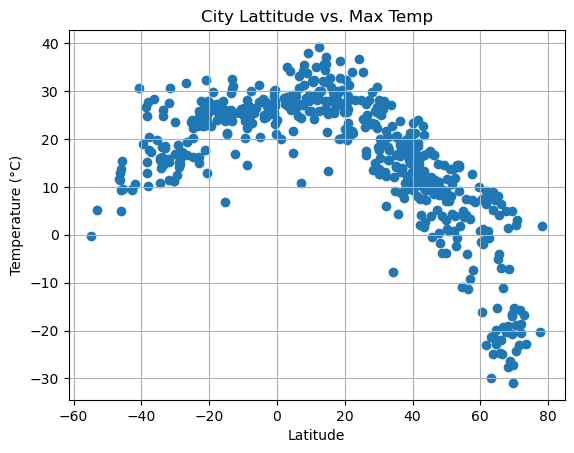

In [215]:
# Build scatter plot for latitude vs. temperature
x_values_temp = city_data_df['Lat']
y_values_temp = city_data_df['Max Temp']
plt.scatter(x_values_temp,y_values_temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')

# Incorporate the other graph properties
plt.title('City Lattitude vs. Max Temp')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png");

# Show plot
plt.show();

#### Latitude Vs. Humidity

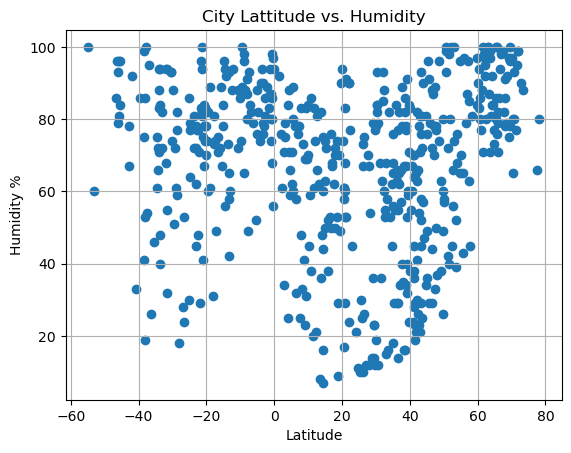

In [216]:
# Build the scatter plots for latitude vs. humidity
x_values_hum = city_data_df['Lat']
y_values_hum = city_data_df['Humidity']
plt.scatter(x_values_hum,y_values_hum)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')

# Incorporate the other graph properties
plt.title('City Lattitude vs. Humidity')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

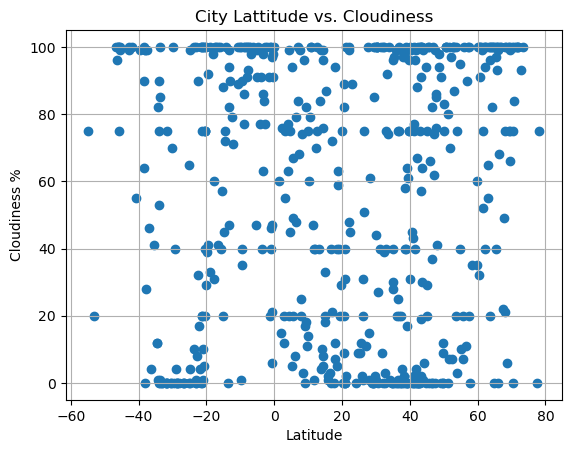

In [217]:
# Build the scatter plots for latitude vs. cloudiness
x_values_cloud = city_data_df['Lat']
y_values_cloud = city_data_df['Cloudiness']
plt.scatter(x_values_cloud,y_values_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')

# Incorporate the other graph properties
plt.title('City Lattitude vs. Cloudiness')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

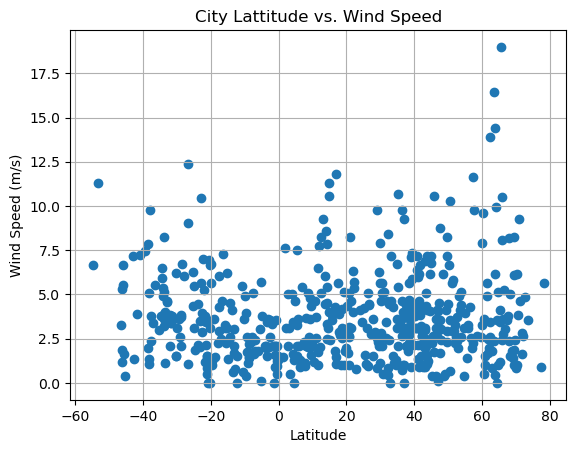

In [218]:
# Build the scatter plots for latitude vs. wind speed
x_values_wind = city_data_df['Lat']
y_values_wind = city_data_df['Wind Speed']
plt.scatter(x_values_wind,y_values_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Incorporate the other graph properties
plt.title('City Lattitude vs. Wind Speed')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [269]:
# Define a function to create Linear Regression plots
def regress_plot(x , y):
    
    # Perform a linear regression on input values
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    
    # Get regression y-values
    regress_values = x * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)
    
    # Create Plot
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")

    # annotate the line equation
    x_loc = x.min()
    y_loc = y.max()
    plt.annotate(line_eq,(x_loc,y_loc),fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [259]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ribeira grande,38.5167,-28.7000,19.22,82,40,5.66,PT,1681059574
3,watertown,42.3709,-71.1828,12.36,26,0,2.68,US,1681059732
4,hamilton,39.1834,-84.5333,17.64,32,0,4.02,US,1681059642
5,nikolskoye,59.7035,30.7861,9.94,97,60,2.62,RU,1681059572
7,umm kaddadah,13.6017,26.6876,31.99,8,84,4.48,SD,1681059776


In [260]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,viedma,-40.8135,-62.9967,30.53,33,55,7.21,AR,1681059657
2,bredasdorp,-34.5322,20.0403,15.64,61,12,5.91,ZA,1681059578
6,punta arenas,-53.1500,-70.9167,5.06,60,20,11.32,CL,1681059365
12,yulara,-25.2406,130.9889,23.52,30,65,4.35,AU,1681059776
13,ushuaia,-54.8000,-68.3000,-0.19,100,75,6.69,AR,1681059575


###  Temperature vs. Latitude Linear Regression Plot

y = -0.67x +38.53
The r-value is: 0.734031847766908


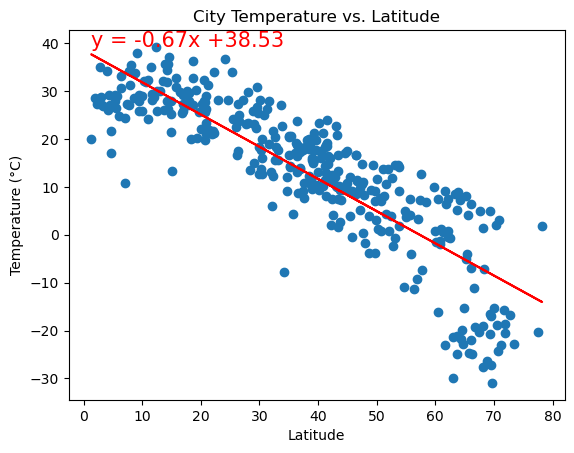

In [270]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('City Temperature vs. Latitude')

# Linear regression in Northern Hemisphere
regress_plot(northern_hemi_df['Lat'] , northern_hemi_df['Max Temp'])

y = 0.32x +28.66
The r-value is: 0.4341283104497348


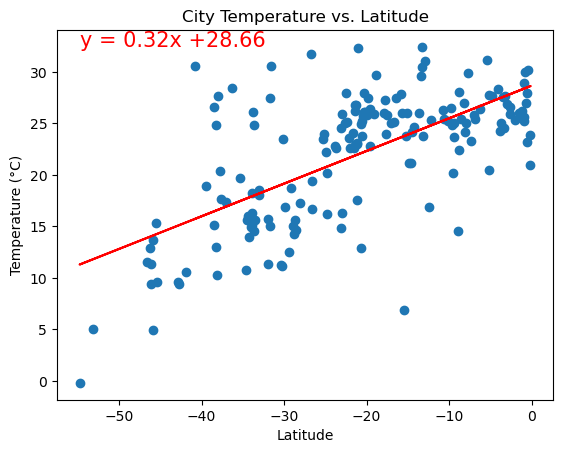

In [271]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('City Temperature vs. Latitude')
# Linear regression on Southern Hemisphere
regress_plot(southern_hemi_df['Lat'] , southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** Temperatures are highest near the equator.

### Humidity vs. Latitude Linear Regression Plot

y = 0.45x +46.5
The r-value is: 0.12496035937562504


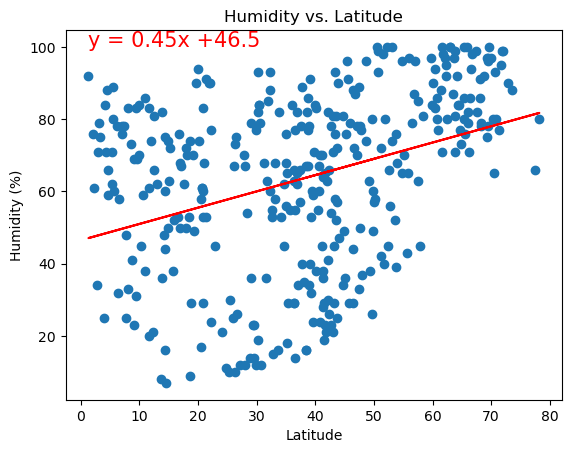

In [272]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude')

# Northern Hemisphere
regress_plot(northern_hemi_df['Lat'] , northern_hemi_df['Humidity'])

y = 0.24x +80.02
The r-value is: 0.028774199824559647


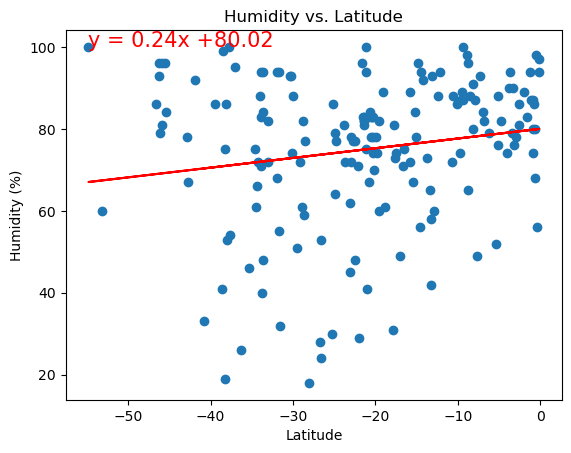

In [273]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude')
# Southern Hemisphere
regress_plot(southern_hemi_df['Lat'] , southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** The r squared values indicate that these trendlines do a very poor summarizing the data. According to these trendlines humidity increased with lattitude in both hemispheres. However, a quick google search disagreed with these findings. Humidity should be highest near the equator, meaning the trendline for the northern hemishpere is inaccurate.

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.48x +34.33
The r-value is: 0.05432612107395111


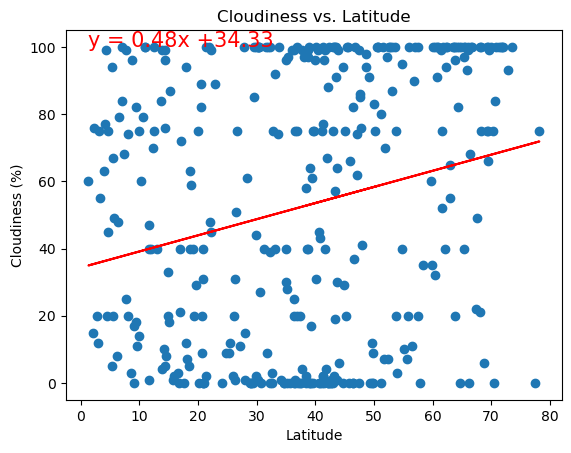

In [278]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude')

# Northern Hemisphere
regress_plot(northern_hemi_df['Lat'] , northern_hemi_df['Cloudiness'])

y = 0.58x +71.09
The r-value is: 0.036378009670413686


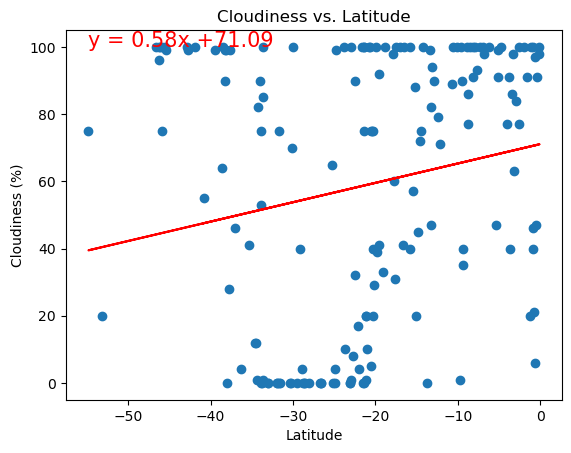

In [280]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude')

# Southern Hemisphere
regress_plot(southern_hemi_df['Lat'] , southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** The r squared values indicate that these trendlines do a very poor summarizing the data. According to these trendlines cloudiness increased with lattitude in both hemispheres, similar to humidity. One could infer from these findings that humidity and cloudiness are correlated. 

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.01x +3.35
The r-value is: 0.007597550404754692


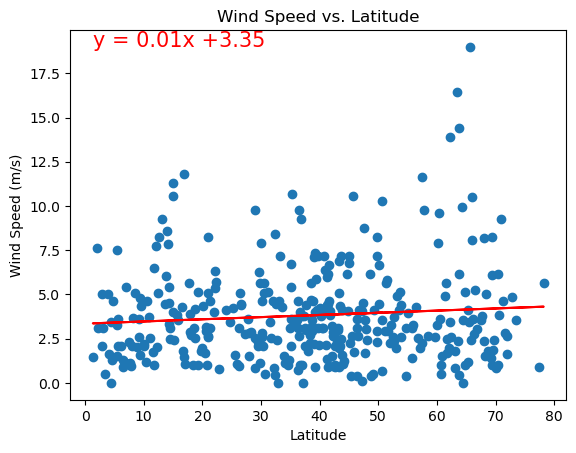

In [281]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs. Latitude')

# Northern Hemisphere
regress_plot(northern_hemi_df['Lat'] , northern_hemi_df['Wind Speed'])

y = -0.07x +1.93
The r-value is: 0.1501299730123091


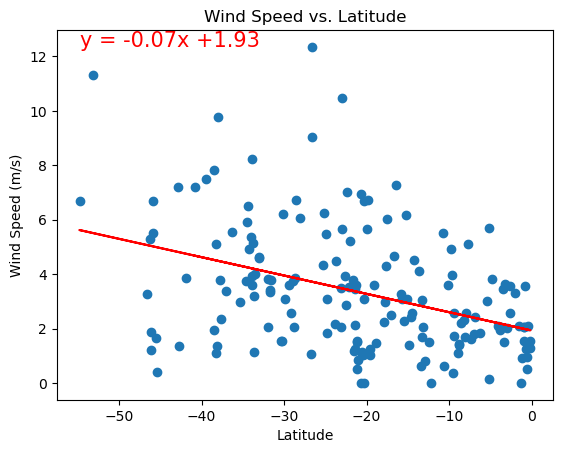

In [282]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs. Latitude')

# Southern Hemisphere
regress_plot(southern_hemi_df['Lat'] , southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** According to these trendlines, wind speeds are lowest near the equator and higher near the poles.